In [1]:
import os
os.listdir("/content")[:20]


['.config', 'prices.csv', 'sample_data']

In [2]:
import pandas as pd

df = pd.read_csv("/content/prices.csv")
print(df.head())
print(df.dtypes)


         date instrument  price
0  2025-11-03        TTF   42.1
1  2025-11-04        TTF   41.6
2  2025-11-05        TTF   43.2
3  2025-11-06        TTF   44.1
4  2025-11-07        TTF   43.5
date           object
instrument     object
price         float64
dtype: object


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/content/prices.csv")
df.head()


,date,instrument,price
0,2025-11-03,TTF,42.1
1,2025-11-04,TTF,41.6
2,2025-11-05,TTF,43.2
3,2025-11-06,TTF,44.1
4,2025-11-07,TTF,43.5


In [5]:
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
print("\nMissing values per column:")
print(df.isna().sum())


Rows: 60
Columns: ['date', 'instrument', 'price']

Missing values per column:
date          0
instrument    0
price         0
dtype: int64


In [6]:
df["date"] = pd.to_datetime(df["date"])
df.dtypes


,0
date,datetime64[ns]
instrument,object
price,float64


In [7]:
df = df.sort_values(["instrument", "date"])
df.head()


,date,instrument,price
20,2025-11-03,EUA,72.4
21,2025-11-04,EUA,72.1
22,2025-11-05,EUA,73.2
23,2025-11-06,EUA,73.6
24,2025-11-07,EUA,74.1


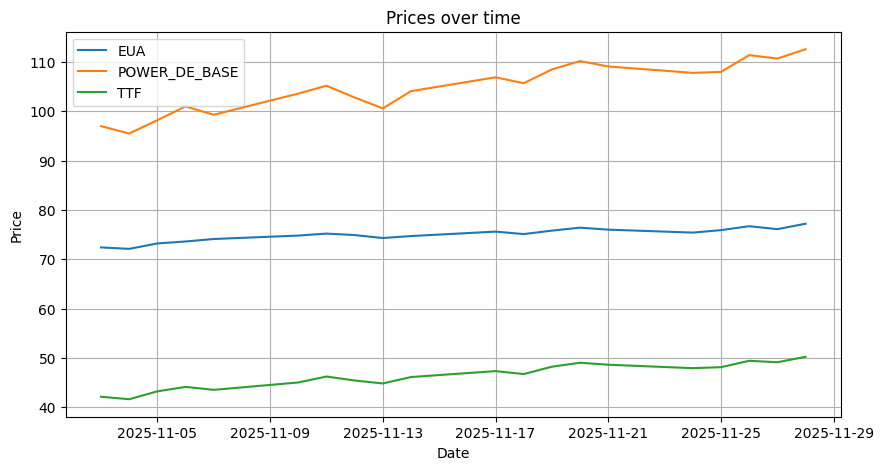

In [8]:
plt.figure(figsize=(10,5))

for inst in df["instrument"].unique():
    temp = df[df["instrument"] == inst]
    plt.plot(temp["date"], temp["price"], label=inst)

plt.title("Prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
df["return"] = df.groupby("instrument")["price"].pct_change()
df.head(10)


,date,instrument,price,return
20,2025-11-03,EUA,72.4,NaN
21,2025-11-04,EUA,72.1,-0.004144
22,2025-11-05,EUA,73.2,0.015257
23,2025-11-06,EUA,73.6,0.005464
24,2025-11-07,EUA,74.1,0.006793
25,2025-11-10,EUA,74.8,0.009447
26,2025-11-11,EUA,75.2,0.005348
27,2025-11-12,EUA,74.9,-0.003989
28,2025-11-13,EUA,74.3,-0.008011
29,2025-11-14,EUA,74.7,0.005384


In [10]:
df["vol_30d"] = df.groupby("instrument")["return"].rolling(30).std().reset_index(level=0, drop=True)
df.tail(10)


,date,instrument,price,return,vol_30d
10,2025-11-17,TTF,47.3,0.026030,NaN
11,2025-11-18,TTF,46.7,-0.012685,NaN
12,2025-11-19,TTF,48.2,0.032120,NaN
13,2025-11-20,TTF,49.0,0.016598,NaN
14,2025-11-21,TTF,48.6,-0.008163,NaN
15,2025-11-24,TTF,47.9,-0.014403,NaN
16,2025-11-25,TTF,48.1,0.004175,NaN
17,2025-11-26,TTF,49.4,0.027027,NaN
18,2025-11-27,TTF,49.1,-0.006073,NaN
19,2025-11-28,TTF,50.2,0.022403,NaN


In [11]:
latest = df.sort_values("date").groupby("instrument").tail(1).set_index("instrument")

summary = pd.DataFrame({
    "last_price": latest["price"],
    "last_vol_30d": latest["vol_30d"]
})

# 5-day change: compare last price to price 5 rows earlier within each instrument
five_day = df.groupby("instrument").tail(6).groupby("instrument").apply(lambda x: x["price"].iloc[-1] - x["price"].iloc[0])
summary["change_5d"] = five_day

summary


/tmp/ipython-input-3681046463.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  five_day = df.groupby("instrument").tail(6).groupby("instrument").apply(lambda x: x["price"].iloc[-1] - x["price"].iloc[0])


,last_price,last_vol_30d,change_5d
instrument,,,
POWER_DE_BASE,112.6,NaN,3.5
EUA,77.2,NaN,1.2
TTF,50.2,NaN,1.6


In [12]:
import os
os.makedirs("outputs", exist_ok=True)


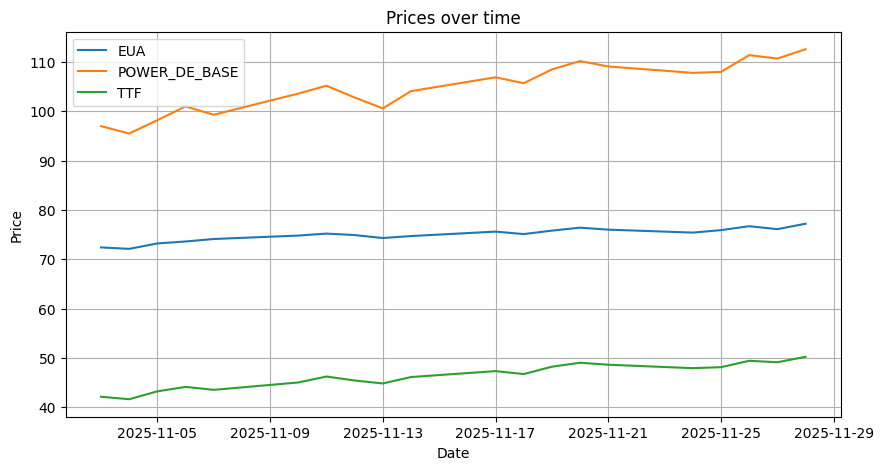

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for inst in df["instrument"].unique():
    temp = df[df["instrument"] == inst]
    plt.plot(temp["date"], temp["price"], label=inst)

plt.title("Prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.savefig("outputs/prices_over_time.png", dpi=200, bbox_inches="tight")
plt.show()


In [14]:
from google.colab import files
files.download("outputs/prices_over_time.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>